# **Koronavirüs (Covid-19) Salgını - Türkiye'nin Durumu Hakkında Veri Analizi**

## SAYI: 41  (18 Ekim 2021)

### HAZIRLAYAN: Doğan Yiğit Yenigün (toUpperCase78)

**Her güne ait tüm sayısal veriler, Türkiye'de ilk vakanın görüldüğü 11 Mart 2020'den beri T. C. Sağlık Bakanlığı Covid-19 Bilgilendirme Sayfası'nda günlük olarak yayımlanan "Türkiye Günlük Covid-19 Tablosu"ndan alınmaktadır.**

### KAYNAK: [covid19.saglik.gov.tr](https://covid19.saglik.gov.tr/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
covid19TR = pd.read_csv('covid_19_Turkiye_2021_10_18.csv')

In [2]:
covid19TR = covid19TR.set_index('Tarih')
covid19TR['Toplam Test'] = covid19TR['Toplam Test'].fillna(0).astype(int)
covid19TR['Günlük Vaka'] = covid19TR['Günlük Vaka'].fillna(0).astype(int)
covid19TR['Toplam Vaka'] = covid19TR['Toplam Vaka'].fillna(0).astype(int)
covid19TR['1. Doz Ort(%)'] = covid19TR['1. Doz Ort(%)'].fillna(0)
covid19TR['2. Doz Ort(%)'] = covid19TR['2. Doz Ort(%)'].fillna(0)
covid19TR['1. Doz Toplam'] = covid19TR['1. Doz Toplam'].fillna(0).astype(int)
covid19TR['2. Doz Toplam'] = covid19TR['2. Doz Toplam'].fillna(0).astype(int)
covid19TR['3. Doz Toplam'] = covid19TR['3. Doz Toplam'].fillna(0).astype(int)
covid19TR['Test Artış'] = covid19TR['Toplam Test'].diff().fillna(0).astype(int)
covid19TR['Vefat Artış'] = covid19TR['Toplam Vefat'].diff().fillna(0).astype(int)
covid19TR['İyileşen Artış'] = covid19TR['Toplam İyileşen'].diff().fillna(0).astype(int)
covid19TR['Vefat +/-'] = covid19TR['Vefat Artış'].diff().fillna(0).astype(int)
covid19TR['Test +/-'] = covid19TR['Test Artış'].diff().fillna(0).astype(int)
covid19TR['Vaka +/-'] = covid19TR['Günlük Vaka'].diff().fillna(0).astype(int)
covid19TR['İyileşen +/-'] = covid19TR['İyileşen Artış'].diff().fillna(0).astype(int)

In [3]:
ind = 274
while covid19TR.iloc[ind,8] != 0:
    covid19TR.iloc[ind-1,9] = covid19TR.iloc[ind,9] - covid19TR.iloc[ind,8]
    ind -= 1

## **Son 20 Güne Dair Sayısal Bilgiler**

In [4]:
covid19TR[['Toplam Test', 'Günlük Vaka', 'Toplam Vaka', 'Toplam Vefat', 'Toplam İyileşen',
           '1. Doz Ort(%)', '2. Doz Ort(%)', '1. Doz Toplam', '2. Doz Toplam', '3. Doz Toplam']].tail(20)

,Toplam Test,Günlük Vaka,Toplam Vaka,Toplam Vefat,Toplam İyileşen,1. Doz Ort(%),2. Doz Ort(%),1. Doz Toplam,2. Doz Toplam,3. Doz Toplam
Tarih,,,,,,,,,,
2021-09-29,85952901,29386,7124966,63838,6583789,86.60,71.35,53753136,44285452,10340145
2021-09-30,86310754,29104,7154070,64054,6615908,86.74,71.69,53840659,44498344,10391762
2021-10-01,86667106,28873,7182943,64264,6642132,86.90,72.11,53941450,44758512,10444738
2021-10-02,87019268,27973,7210916,64467,6664242,86.99,72.35,53997429,44910311,10465405
2021-10-03,87367730,27351,7238267,64661,6686246,87.06,72.54,54038516,45023309,10481025
2021-10-04,87719944,28810,7267077,64909,6719398,87.22,72.91,54140738,45258194,10538215
2021-10-05,88075508,29802,7296879,65138,6751667,87.34,73.23,54214776,45454130,10586681
2021-10-06,88433572,30438,7327317,65376,6783080,87.46,73.53,54284532,45638744,10631256
2021-10-07,88795724,30019,7357336,65593,6815320,87.56,73.80,54347957,45807085,10669992


**NOT 1:** 29 Temmuz 2020'den itibaren _Toplam Yoğun Bakım Sayısı_ ve _Toplam Entübe Hasta Sayısı_ yerine _Hastalarda Zatürre Oranı_ ve _Ağır Hasta Sayısı_ paylaşılmaya başlanmıştır. Buradaki _Ağır Hasta Sayısı,_ oksijen saturasyonu belli oranın altında veya yoğun bakım gerektiren hastalar için uluslararası tanımlamaya uygun olarak belirlenmektedir. **Ancak 4 Temmuz 2021 tarihi itibarıyla bu verilerin paylaşımı durdurulmuştur!**

**NOT 2:** 25 Kasım 2020'den itibaren hasta sayısı üzerine semptomsuz olduğu halde PCR testi pozitif çıkanların da dahil edildiği _Günlük Vaka_ sayısı paylaşılmaya başlanmıştır.

**NOT 3:** Bu tablodaki _Toplam Hasta Sayısı,_ 10 Aralık 2020'den sonra Covid-19 Bilgilendirme Sayfası Günlük Tablosu'nda görünmemesine rağmen halen görünür olan _Günlük Hasta Sayısı_ sonraki günlerin üzerine eklenerek hesaplanmaktadır.

**NOT 4:** 10 Aralık 2020'den itibaren paylaşılan _Toplam Vaka_ sayısı, PCR testi pozitif çıkan tüm kişilerin toplamını göstermektedir.

**NOT 5:** 10 Aralık 2020'den önceki _Toplam Vaka Sayısı,_ mevcut gündeki toplam vaka sayısının günlük vaka sayısı ile farkı alınarak hesaplanmıştır (Günlük Vaka sayısının ilk açıklandığı 25 Kasım 2020'ye doğru geriye dönük gidilerek; yani elde edilen veri 24 Kasım 2020'ye kadardır).

**NOT 6:** _Toplam İyileşen_ sayısı, 12 Aralık 2020'den itibaren iyileşen hastalara ilaveten izolasyon süresi dolan vakaları da dahil etmektedir.

**NOT 7:** 4 Temmuz 2021'den itibaren gösterilen yeni günlük tablo ile _en az bir doz aşı olmuş 18 yaş ve üstü nüfusun 1. doz ve 2. doz Türkiye ortalaması yüzdesi_ ve _1. doz, 2. doz ve 3. doz aşı uygulaması toplamı_ gösterilmeye başlanmıştır.

**NOT 8:** Tüm sayıların tutulduğu veri setinin özelliklerinin yapısı gereği yukarıdaki tabloda genelde toplamlar verilmiş olmasına karşın aşağıdaki analizlerde günlük sayılara dair veriler görülebilmektedir.

## **Covid-19 Salgınının Başından Beri Türkiye'nin Durumu**

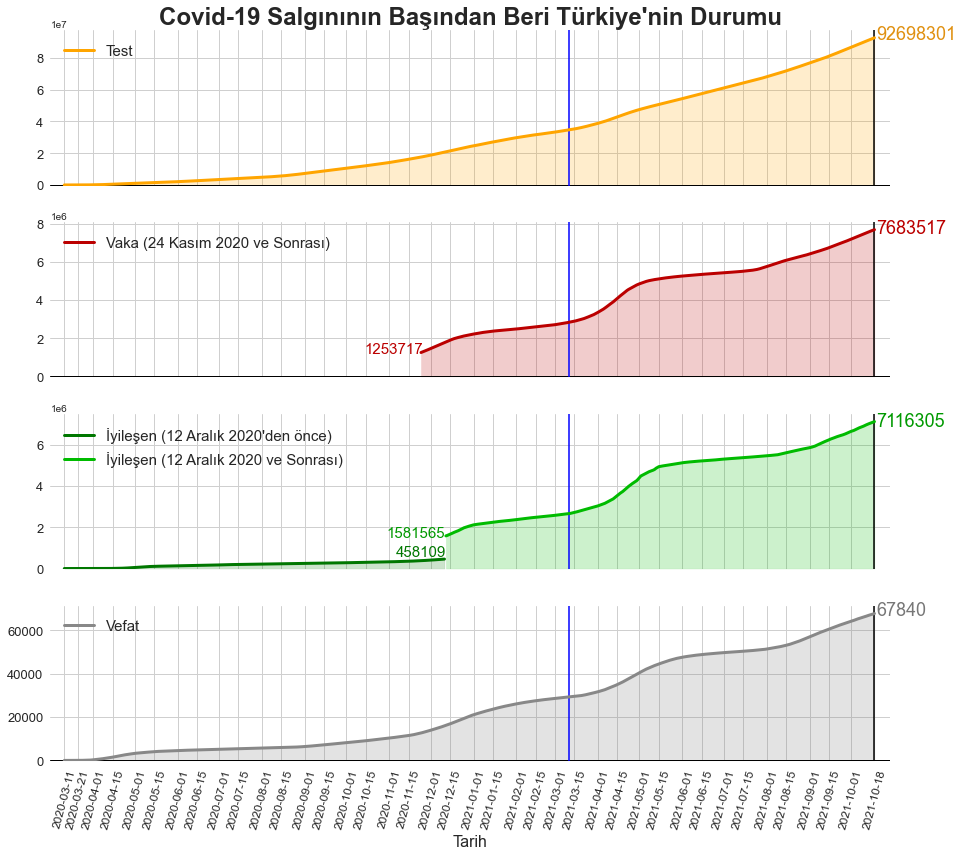

In [5]:
plt.style.use('seaborn')
plt.figure(figsize=(13.5,12), facecolor='white')
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['axes.edgecolor'] = '#eeeeee'
toplam_test = covid19TR['Toplam Test']
toplam_hasta = covid19TR['Toplam Hasta']
toplam_vaka = covid19TR['Toplam Vaka'][258:]
toplam_iyilesen_12ara2020_once = covid19TR['Toplam İyileşen'][:276]
toplam_iyilesen_12ara2020_sonra = covid19TR['Toplam İyileşen'][276:]
toplam_vefat = covid19TR['Toplam Vefat']
toplam_gun = len(covid19TR)
gunler = [0, 10, 21, 35, 51, 65, 82, 96, 112, 126, 143, 157, 174, 188, 204, 218, 235, 249, 265, 279, 296, 310, 327, 341,
          355, 369, 386, 400, 416, 430, 447, 461, 477, 491, 508, 522, 539, 553, 569, len(covid19TR)-1]
def plot_olustur(veri, y_min):
    plt.axis([-10, len(covid19TR)+10, y_min, max(veri)*1.05])
    plt.axhline(0, color='k', linewidth=1)
    plt.axvline(len(covid19TR)-1, color='k', linewidth=1.5)
    plt.axvline(365, color='b', linewidth=1.5)
    plt.yticks(fontsize=13)
    plt.grid(color='#cfcfcf')  
def veri_cizdir(veri, plot_renk, alt_renk, etiket, baslangic = 0, bitis = toplam_gun):
    plt.plot(range(baslangic, bitis), veri, linewidth=3, color=plot_renk, label=etiket)
    plt.fill_between(range(baslangic, bitis), veri, color=alt_renk, alpha=0.2)
    plt.legend(loc='upper left', fontsize=15)
def sayi_yazdir(x_pos, y_pos, sayi, renk, boyut=15):
    plt.text(x_pos, y_pos, sayi, color=renk, fontsize=boyut)
    
plt.subplot(4, 1, 1)
plot_olustur(toplam_test, -350000)
veri_cizdir(toplam_test, 'orange', 'orange', 'Test')
sayi_yazdir(toplam_gun+0.25, toplam_test[-1]-1000000, toplam_test[-1], '#e09112', 18)
plt.title('Covid-19 Salgınının Başından Beri Türkiye\'nin Durumu', fontsize=24, fontweight='bold')
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.subplot(4, 1, 2)
plot_olustur(toplam_vaka, -50000)
veri_cizdir(toplam_vaka, '#bb0000', '#bb0000', 'Vaka (24 Kasım 2020 ve Sonrası)', 258)
sayi_yazdir(toplam_gun+0.25, toplam_vaka[-1]-200000, toplam_vaka[-1], '#bb0000', 18)
sayi_yazdir(217, toplam_vaka[0]-60000, toplam_vaka[0], '#bb0000')
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.subplot(4, 1, 3)
plot_olustur(toplam_iyilesen_12ara2020_sonra, -40000)
veri_cizdir(toplam_iyilesen_12ara2020_once, '#007700', '#007700', 'İyileşen (12 Aralık 2020\'den önce)', 0, 276)
veri_cizdir(toplam_iyilesen_12ara2020_sonra, '#00bb00', '#00bb00', 'İyileşen (12 Aralık 2020 ve Sonrası)', 276)
sayi_yazdir(240, toplam_iyilesen_12ara2020_once[-1]+135000, toplam_iyilesen_12ara2020_once[-1], '#007700')
sayi_yazdir(toplam_gun+0.25, toplam_iyilesen_12ara2020_sonra[-1]-200000, toplam_iyilesen_12ara2020_sonra[-1], '#009900', 18)
sayi_yazdir(233, toplam_iyilesen_12ara2020_sonra[0]-45000, toplam_iyilesen_12ara2020_sonra[0], '#009900')
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.subplot(4, 1, 4)
plot_olustur(toplam_vefat, -400)
veri_cizdir(toplam_vefat, '#888888', '#777777', 'Vefat')
sayi_yazdir(toplam_gun+0.25, toplam_vefat[-1]-1000, toplam_vefat[-1], '#777777', 18)
plt.xlabel('Tarih', fontsize=16)
plt.xticks(gunler, covid19TR.index[gunler], fontsize=12, rotation=75)
plt.tight_layout()
plt.show()

_Yukarıdaki grafiklerde bulunan koyu mavi dik çizgiler, 11 Mart 2021 tarihini yani ilk vakanın üzerinden geçen bir yılı işaret etmektedir._

### **Türkiye'de bir buçuk yıl süredir devam eden Koronavirüs ile mücadelesinde yukarıdaki grafiklere bakıldığında;**

Toplam test sayısının en baştan itibaren eğimin **üstel** gibi bir hal aldığı ve sonrasında **neredeyse sabit şekilde** yükselişini sürdürerek **92 milyonu geçtiğini** görmekteyiz.

Toplam vaka sayıları (**NOT 5**'e bakınız) **Aralık 2020'nin ikinci yarısına** kadar sabit bir şekilde artmış, sonrasında **giderek yavaşlamış**; **Mart 2021'in ikinci yarısından sonra** eğimin yeniden büyük ölçüde yükseldiği ama **tam kapanmanın** sonrasında son bir ay içinde artışın **önemli ölçüde** azaldığı, ancak sonrasında özellikle de **son üç ayda** hızlıca **yükselişini** sürdürerek **7.6 milyonu** geçmiştir!

Toplam iyileşen sayısı, _12 Aralık 2020_ tarihine kadar yaklaşık **460 bin** civarında idi. Bu tarihten sonra **izolasyon süresi dolan vakalar**ın da dahil edilmesiyle (yukarıdaki **NOT 6**'ya bakınız) sayıda bir anda sıçrama yaşanmıştır _(1 milyonun üzerinde)_ ve grafiğe göre **2020'nin sonlarına doğru sabit** şekilde yükselmiş, sonrasında yavaşlamış, devamında **Mart 2021'in yarısına kadar aynı seyirde** devam etmiş ve **Mayıs 2021'in ikinci yarısına kadar** hızlı artış yaşanıp, bundan sonrasında eğimin **daha yatay** seviyede sürmesi ve son haftalardaki **artış eğilimiyle 7.1 milyonu** aşmıştır!

Toplam vefat sayısındaki eğim için başlarda, **Nisan 2020 içinde** yüksek seyretmiş, **Mayıs 2020'den sonra** yavaşlamış, ama **Eylül 2020'den itibaren** yine giderek yükselmiş ve bu eğim **Kasım 2020'nin ikinci yarısından sonra** artmaya devam etmiştir! **2021'in başından itibaren giderek yavaşlasa** da özellikle **Mart 2021'in ikinci yarısından sonra** yeniden yükselişe geçmiştir. **Tam kapanmadan** sonra **yeniden yatay seyirde olduğu** görülse de özellikle **son iki ay** içinde **hızlı yükselişte bulunarak 68 bine** doğru yaklaşmıştır!

## Covid-19 - Türkiye'de Aşılamanın Durumu

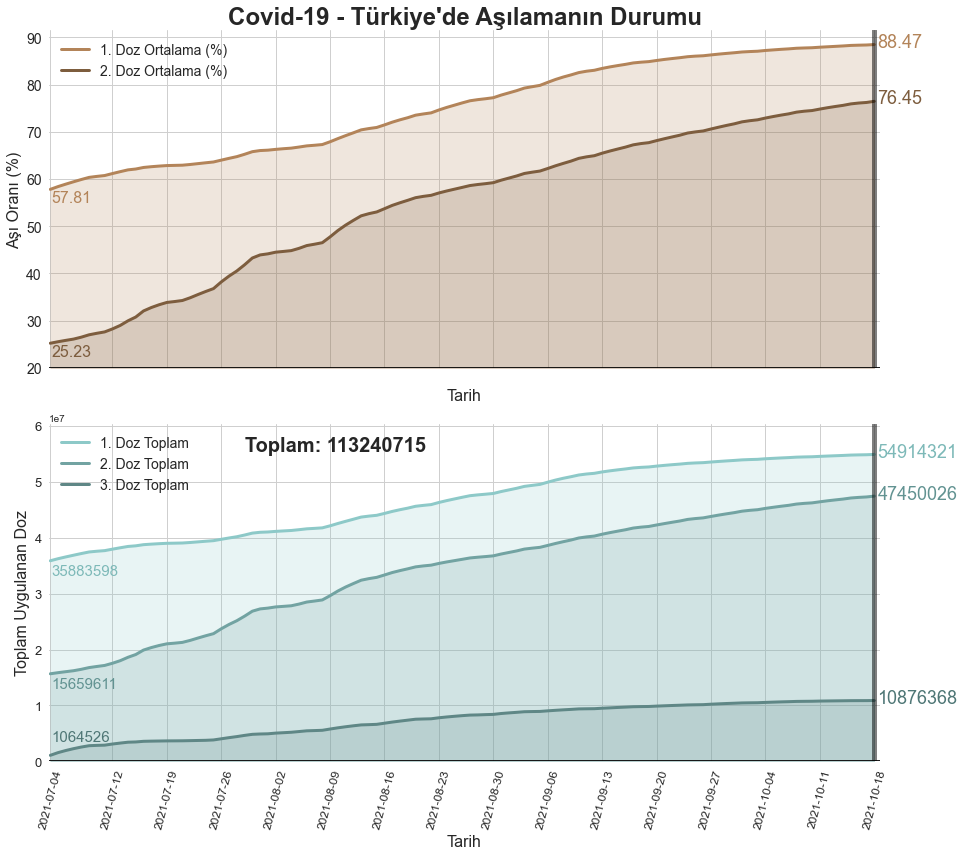

In [6]:
birinci_doz_ort = covid19TR['1. Doz Ort(%)'][480:]
ikinci_doz_ort = covid19TR['2. Doz Ort(%)'][480:]
birinci_doz_toplam = covid19TR['1. Doz Toplam'][480:]
ikinci_doz_toplam = covid19TR['2. Doz Toplam'][480:]
ucuncu_doz_toplam = covid19TR['3. Doz Toplam'][480:]
gunler = [0, 8, 15, 22, 29, 36, 43, 50, 57, 64, 71, 78, 85, 92, 99, len(birinci_doz_ort)-1]
genel_toplam = covid19TR['1. Doz Toplam'][-1] + covid19TR['2. Doz Toplam'][-1] + covid19TR['3. Doz Toplam'][-1]
plt.figure(figsize=(13.5,12))
plt.subplot(2,1,1)
plt.axis([-0.2, len(birinci_doz_ort)-0.2, 20, max(birinci_doz_ort)+3])
plt.axhline(20, color='k')
plt.plot(birinci_doz_ort, color='#b38459', linewidth=3, label='1. Doz Ortalama (%)')
plt.fill_between(range(0, len(birinci_doz_ort)), birinci_doz_ort, color='#b38459', alpha=0.2)
plt.text(0.1, birinci_doz_ort[0]-2.7, birinci_doz_ort[0], color='#b38459', fontsize=16)
plt.text(len(birinci_doz_ort)-0.6, birinci_doz_ort[-1]-0.5, birinci_doz_ort[-1], color='#b38459', fontsize=18)
plt.plot(ikinci_doz_ort, color='#7d5d3e', linewidth=3, label='2. Doz Ortalama (%)')
plt.fill_between(range(0, len(ikinci_doz_ort)), ikinci_doz_ort, color='#7d5d3e', alpha=0.2)
plt.text(len(ikinci_doz_ort)-0.6, ikinci_doz_ort[-1]-0.5, ikinci_doz_ort[-1], color='#7d5d3e', fontsize=18)
plt.text(0.1, ikinci_doz_ort[0]-2.7, ikinci_doz_ort[0], color='#7d5d3e', fontsize=16)
plt.axvline(len(birinci_doz_ort)-1, linewidth=5, color='k', alpha=0.5)
plt.title('Covid-19 - Türkiye\'de Aşılamanın Durumu', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('Aşı Oranı (%)', fontsize=16)
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(color='#cfcfcf')
plt.subplot(2,1,2)
plt.axis([-0.2, len(birinci_doz_toplam)-0.2, 0, birinci_doz_toplam.max()*1.1])
plt.text(25, birinci_doz_toplam[-1]+600000, "Toplam: {}".format(genel_toplam),
        fontsize=20, fontweight='bold')
plt.plot(birinci_doz_toplam, color='#8dc9c8', linewidth=3, label='1. Doz Toplam')
plt.fill_between(range(0, len(birinci_doz_toplam)), birinci_doz_toplam, color='#8dc9c8', alpha=0.2)
plt.text(len(birinci_doz_toplam)-0.6, birinci_doz_toplam[-1]-500000, birinci_doz_toplam[-1], color='#7db9b8', fontsize=18)
plt.text(0.1, birinci_doz_toplam[0]-2500000, birinci_doz_toplam[0], color='#7db9b8', fontsize=15)
plt.plot(ikinci_doz_toplam, color='#72a3a2', linewidth=3, label='2. Doz Toplam')
plt.fill_between(range(0, len(ikinci_doz_toplam)), ikinci_doz_toplam, color='#72a3a2', alpha=0.2)
plt.text(len(ikinci_doz_toplam)-0.6, ikinci_doz_toplam[-1]-500000, ikinci_doz_toplam[-1], color='#629392', fontsize=18)
plt.text(0.1, ikinci_doz_toplam[0]-2500000, ikinci_doz_toplam[0], color='#629392', fontsize=15)
plt.plot(ucuncu_doz_toplam, color='#5f8786', linewidth=3, label='3. Doz Toplam')
plt.fill_between(range(0, len(ucuncu_doz_toplam)), ucuncu_doz_toplam, color='#5f8786', alpha=0.2)
plt.text(len(ucuncu_doz_toplam)-0.6, ucuncu_doz_toplam[-1]-500000, ucuncu_doz_toplam[-1], color='#4f7776', fontsize=18)
plt.text(0.1, ucuncu_doz_toplam[0]+2500000, ucuncu_doz_toplam[0], color='#4f7776', fontsize=15)
plt.axvline(len(birinci_doz_toplam)-1, linewidth=5, color='k', alpha=0.5)
plt.axhline(0, color='k')
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('Toplam Uygulanan Doz', fontsize=16)
plt.xticks(gunler, birinci_doz_ort.index[gunler], fontsize=12, rotation=75)
plt.yticks(fontsize=13)
plt.legend(fontsize=14)
plt.grid(color='#cfcfcf')
plt.tight_layout()
plt.show()

**Yukarıda görülen ilgili oranlar ve sayılar, en az bir doz aşı olmuş 18 yaş ve üstü nüfusu kapsamaktadır.**

_4 Temmuz-18 Ekim 2021 tarihleri arasındaki aşı oranlarını ve toplam uygulanan dozları incelediğimizde;_

* Birinci doz ortalamasının **%57.81**'den **%88.47**'ye; ikinci doz ortalamasının da **%25.23'**ten **%76.45**'e yükseldiğini görmekteyiz.
* Toplam uygulanan doz sayıları için grafikte yazılanlara ilaveten, ilk açıklanan günden bugüne 1. dozda **19 milyon 30 bin 723**, 2. dozda **31 milyon 790 bin 415** ve 3. dozda ise **9 milyon 811 bin 842** doz artış kaydedilmiştir.

## Covid-19 - Türkiye'de Son 20 Güne Ait Aşılama Grafiği

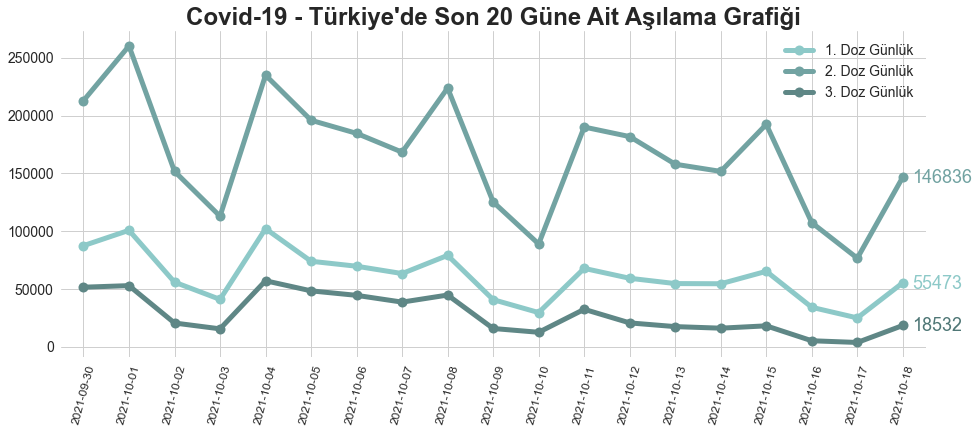

In [7]:
birinci_doz_son20gun = covid19TR['1. Doz Toplam'][-20:].diff()
ikinci_doz_son20gun = covid19TR['2. Doz Toplam'][-20:].diff()
ucuncu_doz_son20gun = covid19TR['3. Doz Toplam'][-20:].diff()
plt.figure(figsize=(15.5,6))
plt.xlim([0.5, 19.5])
plt.plot(birinci_doz_son20gun, color='#8dc9c8', linewidth=5, marker='o', markersize=10, label='1. Doz Günlük')
plt.text(19.2, birinci_doz_son20gun[-1]-5000, int(birinci_doz_son20gun[-1]), fontsize=18, color='#8dc9c8')
plt.plot(ikinci_doz_son20gun, color='#72a3a2', linewidth=5, marker='o', markersize=10, label='2. Doz Günlük')
plt.text(19.2, ikinci_doz_son20gun[-1]-5000, int(ikinci_doz_son20gun[-1]), fontsize=18, color='#72a3a2')
plt.plot(ucuncu_doz_son20gun, color='#5f8786', linewidth=5, marker='o', markersize=10, label='3. Doz Günlük')
plt.text(19.2, ucuncu_doz_son20gun[-1]-5000, int(ucuncu_doz_son20gun[-1]), fontsize=18, color='#4f7776')
plt.title('Covid-19 - Türkiye\'de Son 20 Güne Ait Aşılama Grafiği', fontsize=24, fontweight='bold')
plt.xticks(rotation=75, fontsize=12)
plt.yticks(fontsize=14)
plt.grid(color='#cfcfcf')
plt.legend(fontsize=14)
plt.show()

Türkiye'de son 20 güne ait aşılama sayılarına baktığımızda, 1. dozun günlük aşılama sayılarının 2. dozun günlük aşılama sayılarına kıyasla **her zaman gerisinde kaldığı** açıkça görülmektedir. Başka bir deyişle, 2. doz günlük aşı sayılarının yukarıdaki grafiğe göre **bu denli yüksek seyretmesi** ile toplamda 1. doza giderek yaklaştığını ifade edebiliriz. Üçüncü doz günlük aşı sayıları ise benzer şekilde **hep 1. ve 2. dozun arkasında** seyretmeye devam etmektedir.

_Yine ilginçtir ki grafikteki tüm günlük doz çizgilerinin birbirlerine çok benzer oranlarda artması ve azalması da dikkat çekmektedir!_

## Covid-19 - Tüm Günler Vaka, Vefat & İyileşen Artış Sayıları & Gelecek İçin Tahminler

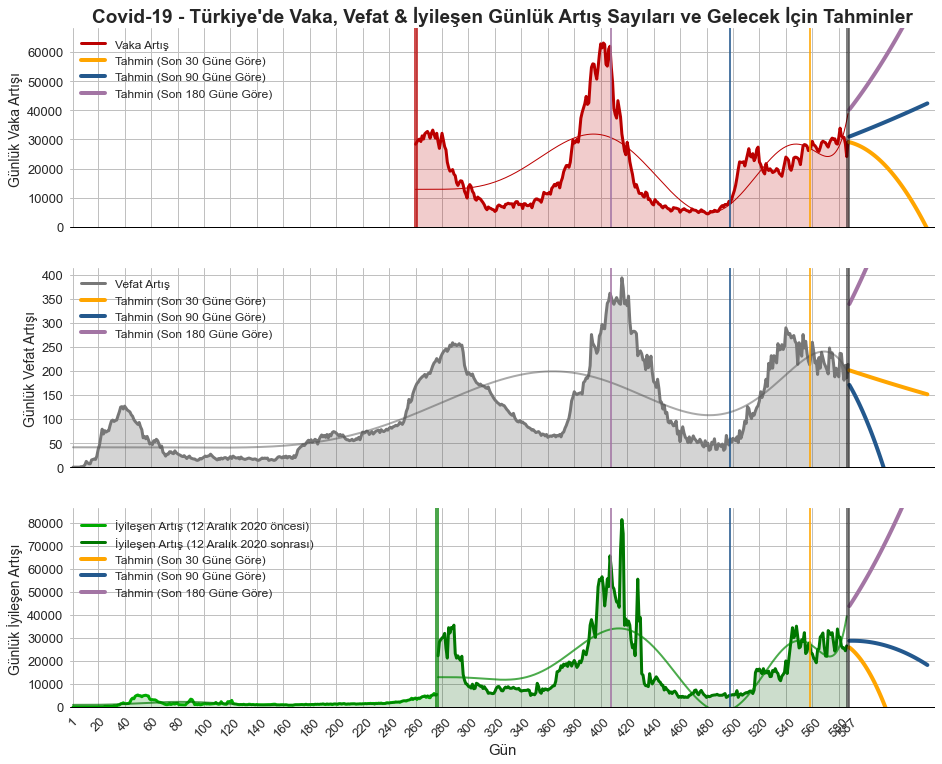

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
vaka_artis = covid19TR['Günlük Vaka'][259:]
vefat_artis = covid19TR['Vefat Artış']
iyilesen_artis_12ara2020_once = covid19TR['İyileşen Artış'][:276]
iyilesen_artis_12ara2020_sonra = covid19TR['İyileşen Artış'][277:]
gun_cizgiler = np.array([g for g in range(19,len(covid19TR)-1,20)])
gun_cizgiler = np.insert(gun_cizgiler, 0, 0)
gun_cizgiler = np.append(gun_cizgiler, len(covid19TR)-1)
gun_araliklar = [30, 90, 180]
renk=['orange', '#23588d', '#a375a4']
y_ileri_tahminler = []
polynomial = PolynomialFeatures(degree=2)
linear = LinearRegression()
for s in range(1,4):
    y_ileri_tahmin = []
    for g in gun_araliklar:
        if s == 1:     y = vaka_artis.fillna(0).values[-g:].reshape(-1,1)
        elif s == 2:   y = iyilesen_artis_12ara2020_sonra.values[-g:].reshape(-1,1)
        elif s == 3:   y = vefat_artis.values[-g:].reshape(-1,1)
        x = np.array(list(range(len(y)))).reshape(-1,1)
        x_test = np.array(list(range(len(y), len(y)+60))).reshape(-1,1)
        x_poly = polynomial.fit_transform(x)
        x_test_poly = polynomial.fit_transform(x_test)
        linear.fit(x_poly, y)
        y_ileri_tahmin.append(linear.predict(x_test_poly))
    y_ileri_tahminler.append(y_ileri_tahmin)
y_mevcut_tahminler = []
polynomial = PolynomialFeatures(degree=9)
for s in range(1,5): 
    if s == 1:    y = vaka_artis.fillna(0).values.reshape(-1,1)
    elif s == 2:  y = iyilesen_artis_12ara2020_once.fillna(0).values.reshape(-1,1)
    elif s == 3:  y = iyilesen_artis_12ara2020_sonra.fillna(0).values.reshape(-1,1)
    elif s == 4:  y = vefat_artis.fillna(0).values.reshape(-1,1)
    x = np.array(list(range(len(y)))).reshape(-1,1)
    x_poly = polynomial.fit_transform(x)
    linear.fit(x_poly, y)
    y_mevcut_tahminler.append(linear.predict(x_poly))
    
def plot_cizdir(veri, y_alt, y_ust, y_etiket, x_tick, x_tick_metin):
    plt.axis([-2, len(covid19TR)+65, y_alt, veri.max()+y_ust])
    plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.5)
    plt.axhline(0, color='k', linewidth=1)
    plt.yticks(fontsize=13)
    plt.ylabel(y_etiket, fontsize=14)
    plt.xticks(x_tick, x_tick_metin, fontsize=13, rotation=45)
    plt.grid(color='#c0c0c0')
    plt.legend(loc='upper left', fontsize=12)  
def veri_cizdir(veri, baslangic, bitis, renk, kalinlik=1, alpha=1, etiket=None):
    plt.plot(range(baslangic, bitis), veri, color=renk, linewidth=kalinlik, alpha=alpha, label=etiket) 
def tahmin_cizdir(veri, gunler, renk, etiket, kalinlik=1):
    plt.plot(gunler, veri, color=renk, label=etiket, linewidth=kalinlik)
def alan_doldur(veri, baslangic, bitis, renk, alpha):
    plt.fill_between(range(baslangic, bitis), veri, color=renk, alpha=alpha)
def cizgi_yerlestir(pozisyon, renk, alpha, kalinlik):
    plt.axvline(x=pozisyon, color=renk, alpha=alpha, linewidth=kalinlik)
    
plt.figure(figsize=(15.5,12.5))
plt.subplot(3,1,1)
plt.title('Covid-19 - Türkiye\'de Vaka, Vefat & İyileşen Günlük Artış Sayıları ve Gelecek İçin Tahminler', 
          fontsize=19, fontweight='bold')
veri_cizdir(vaka_artis, 259, len(covid19TR), '#bb0000', 3, 1, 'Vaka Artış')
veri_cizdir(y_mevcut_tahminler[0], 259, len(covid19TR), '#bb0000')
alan_doldur(vaka_artis, 259, len(covid19TR), '#bb0000', 0.2)
cizgi_yerlestir(259, '#bb0000', 0.7, 4)
for i in range(len(gun_araliklar)):
    tahmin_cizdir(y_ileri_tahminler[0][i], x_test+len(covid19TR)-180, renk[i], 
                  'Tahmin (Son ' + str(gun_araliklar[i]) + ' Güne Göre)', 4)
    cizgi_yerlestir(len(covid19TR)-gun_araliklar[i], renk[i], 0.8, 2)
plot_cizdir(vaka_artis, -500, 5000, 'Günlük Vaka Artışı', gun_cizgiler, 
            ['' for _ in range(len(gun_cizgiler))])
plt.subplot(3,1,2)
veri_cizdir(vefat_artis, 0, len(covid19TR), '#777777', 3, 1, 'Vefat Artış')
veri_cizdir(y_mevcut_tahminler[3], 0, len(covid19TR), '#555555', 2, 0.5)
alan_doldur(vefat_artis, 0, len(covid19TR), '#555555', 0.25)
for i in range(len(gun_araliklar)):
    tahmin_cizdir(y_ileri_tahminler[2][i], x_test+len(covid19TR)-180, renk[i],
                 'Tahmin (Son ' + str(gun_araliklar[i]) + ' Güne Göre)', 4)
    cizgi_yerlestir(len(covid19TR)-gun_araliklar[i], renk[i], 0.8, 2)
plot_cizdir(vefat_artis, -2, 20, 'Günlük Vefat Artışı', gun_cizgiler, ['' for _ in range(len(gun_cizgiler))])
plt.subplot(3,1,3)
veri_cizdir(iyilesen_artis_12ara2020_once, 0, len(iyilesen_artis_12ara2020_once), '#00aa00', 3, 1, 
            'İyileşen Artış (12 Aralık 2020 öncesi)')
veri_cizdir(y_mevcut_tahminler[1], 0, len(y_mevcut_tahminler[1]), '#007700', 2, 0.7)
veri_cizdir(iyilesen_artis_12ara2020_sonra, 276, len(iyilesen_artis_12ara2020_sonra)+276, '#007700', 3, 1,
            'İyileşen Artış (12 Aralık 2020 sonrası)')
veri_cizdir(y_mevcut_tahminler[2], 276, len(covid19TR)-1, '#008800', 2, 0.7)
alan_doldur(iyilesen_artis_12ara2020_once, 0, len(covid19TR[:276]), '#008800', 0.2)
alan_doldur(iyilesen_artis_12ara2020_sonra, 276, len(covid19TR)-1, '#005500', 0.2)
cizgi_yerlestir(275, 'g', 0.7, 4)
for i in range(len(gun_araliklar)):
    tahmin_cizdir(y_ileri_tahminler[1][i], x_test+len(covid19TR)-180, renk[i], 
                  'Tahmin (Son ' + str(gun_araliklar[i]) + ' Güne Göre)', 4)
    cizgi_yerlestir(len(covid19TR)-gun_araliklar[i], renk[i], 0.8, 2)
plot_cizdir(iyilesen_artis_12ara2020_sonra, -400, 5000, 'Günlük İyileşen Artışı', gun_cizgiler, gun_cizgiler+1)
plt.xlabel('Gün', fontsize=15)
plt.show()

_**ÖNEMLİ 1:** 12 Aralık 2020 gününe ait iyileşen artış sayısının 1 milyonun üzerinde çıkmasından dolayı tutarlılık açısından ilgili grafiğe dahil edilmemiştir!_

_**ÖNEMLİ 2:** 4 Temmuz 2021'den itibaren gösterilmeye başlanan yeni Günlük Covid-19 Tablosu ile artık Hasta Sayısı verisi paylaşılmadığından ilgili grafik ve tahmin artık yer almamaktadır!_

**_Makine öğrenmesi yardımıyla_ gelecekteki günler için tahminlere baktığımızda;**

* _VAKA_ sayısında mevcut gün aralıklarındaki veriler değerlendirildiğinde son 30 güne göre **hızlıca düşüşün olacağı**, ama son 90 güne göre **giderek yükselmeye devam edeceği** ve daha kötüsü son 180 günlük içinse ***daha hızlı yükselme olacağı*;
* _VEFAT_ sayısında son 30 güne göre **hafif azalmanın** olacağı, son 90 güne göre **hızlı bir şekilde düşüşün olacağı** ve 180 güne göre ise **aksine çok hızlı artışlar olacağı**;
* _İYİLEŞEN_ sayısında son 30 güne göre **hızla azalmanın olacağı ve sıfırlanacağı**; son 90 güne göre **bir süre sabit kalıp sonra hafifçe azalacağı** ve 180 günlük verilere göre **çok hızlı artışlar olacağı** öngörülmektedir!

## Son 20 Gün İçindeki Günlük Vaka Sayıları

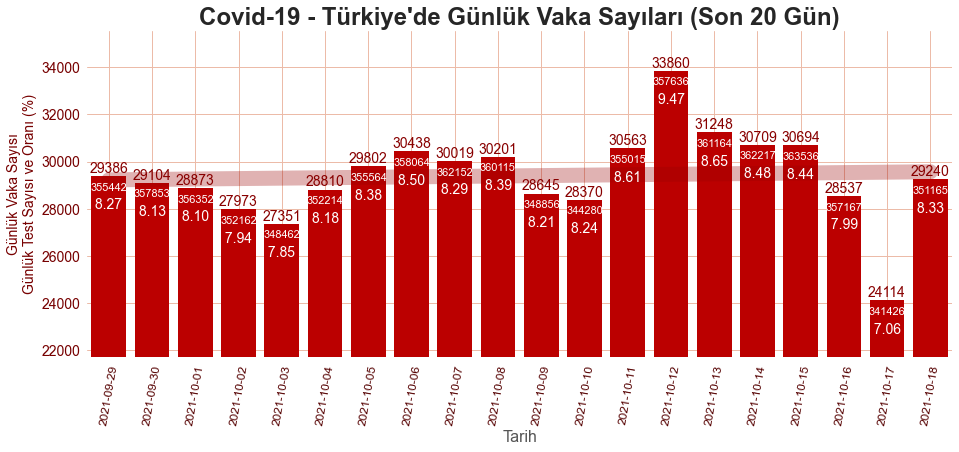

In [9]:
plt.figure(figsize=(15.5,6))
gunluk_vaka_son20 = covid19TR['Günlük Vaka'][-20:]
slp, intcp = np.polyfit(list(range(20)), gunluk_vaka_son20, 1)
plt.bar(covid19TR.index[-20:], gunluk_vaka_son20, color='#bb0000')
plt.axis([-0.5,19.5,gunluk_vaka_son20.min()*0.9,gunluk_vaka_son20.max()*1.05])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#550000')
plt.yticks(color='#770000', fontsize=14)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.55), covid19TR.iloc[i,8]+150, 
             "{:5}".format(int(covid19TR.iloc[i,8])), fontsize=14, color='#880000')
    plt.text(i-(len(covid19TR)-19.58), covid19TR.iloc[i,8]-600, int(covid19TR.iloc[i,15]), fontsize=11, color='white')
    plt.text(i-(len(covid19TR)-19.60), covid19TR.iloc[i,8]-1400, 
            "{:5.2f}".format(covid19TR.iloc[i,8] / covid19TR.iloc[i,15] * 100), fontsize=14, color='white')
plt.plot([0, 19],[intcp, intcp+(slp*19)], color='#990000', linewidth=15, alpha=0.3)
plt.title('Covid-19 - Türkiye\'de Günlük Vaka Sayıları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Günlük Vaka Sayısı\nGünlük Test Sayısı ve Oranı (%)', fontsize=14, color='#770000')
plt.grid(color='#ecbba8')
plt.show()

Son 20 günün vaka sayıları incelendiğinde, yine **bir aşağı bir yukarı** şekilde seyretmeye devam ettiği söylenebilir. Günlük **30 binin** üzerinde çıkan sayılarla beraber, en düşük açıklanan sayı 17 Eylül 2021'de **24114** olmuştur.

Günlük test sayısına oranlarda genel anlamda **%7.8-8.7** arasında ilerlediğini görmekteyiz. Ama aykırı sayılabilecek oranlar ise 12 Eylül 2021'de **%9.47** ile en yüksek değere ulaşırken, diğer taraftan 17 Eylül 2021'de **%7.06**'lık orana rastlanılmıştır.

## Son 20 Güne Dair Toplam Vaka Sayıları

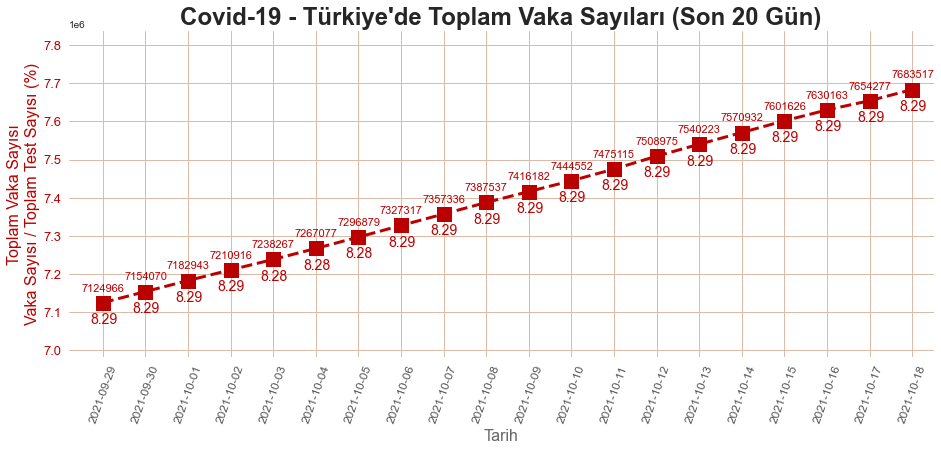

In [10]:
plt.figure(figsize=(15.5,6))
toplam_vaka_son20 = covid19TR['Toplam Vaka'][-20:]
plt.axis([-0.8,19.5,min(toplam_vaka_son20)*0.98,max(toplam_vaka_son20)*1.02])
plt.plot(covid19TR.index[-20:], covid19TR['Toplam Vaka'][-20:], marker='s', markersize=15, linewidth=3, 
         linestyle='--', color='#bb0000')
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-len(covid19TR)+19.5, covid19TR.iloc[i,9]+30000, covid19TR.iloc[i,9], color='#bb0000', fontsize=11)
    plt.text(i-len(covid19TR)+19.7, covid19TR.iloc[i,9]-55000, "{:.2f}".format(covid19TR.iloc[i,9]/covid19TR.iloc[i,3]*100), 
             color="#bb0000", fontsize=14)
plt.title('Covid-19 - Türkiye\'de Toplam Vaka Sayıları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#666666')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.ylabel('Toplam Vaka Sayısı\nVaka Sayısı / Toplam Test Sayısı (%)', fontsize=16, color='#bb0000')
plt.yticks(fontsize=13, color='#bb0000')
plt.grid(color='#dcbba8')
plt.show()

**10 Aralık 2020**'den itibaren paylaşılmaya başlanan ve mevcut _Günlük Vaka_ sayıları ile geriye dönük hesaplamaları da dahil olunan (yukarıdaki **NOT 5**'e bakınız) _Toplam Vaka Sayılarına_ dair grafiğe göre en son 18 Ekim 2021'de **7 milyon 683 bin 517**'ye yükselmiştir. 

Bu sayıların toplam test sayılarına oranı, dikkatlice bakıldığında sadece **%8.28** ve **%8.29** olarak gerçekleştiğini yani **sabit şekilde** korundğunu belirtebiliriz.

## Son 20 Günün Vaka Sayısı Değişim Grafiği

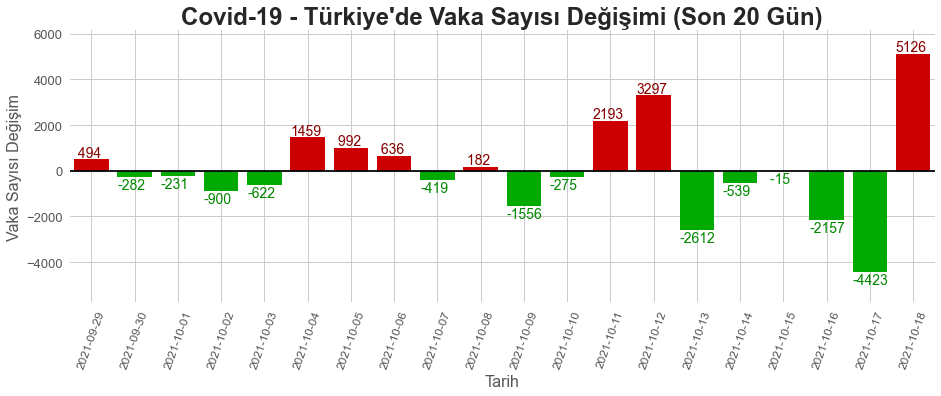

In [11]:
vaka_degisim = covid19TR['Vaka +/-'][-20:]
plt.figure(figsize=(15.5,5))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,20] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], vaka_degisim, color=barc)
plt.axis([-0.5,19.5,min(vaka_degisim)*1.3,max(vaka_degisim)*1.2])
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,20] >= 0:
        c = '#880000'; vsh = 120
    else:   c = '#008800'; vsh = -520
    plt.text(i-(len(covid19TR)-19.6), covid19TR.iloc[i,20]+vsh, 
             "{:4}".format(int(covid19TR.iloc[i,20])), fontsize=14, color=c)
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Vaka Sayısı Değişimi (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vaka Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün vaka sayısı değişimi incelendiğinde, en çok **5126** artış (18 Ekim 2021), ve en çok **4423** azalış (17 Ekim 2021) olmuştur. 

Bu değişimlerin yine **bir yukarıya ve bir aşağıya** doğru gittiğini görmekteyiz!

## **Son 20 Gün İçindeki Günlük Vefat Sayıları**

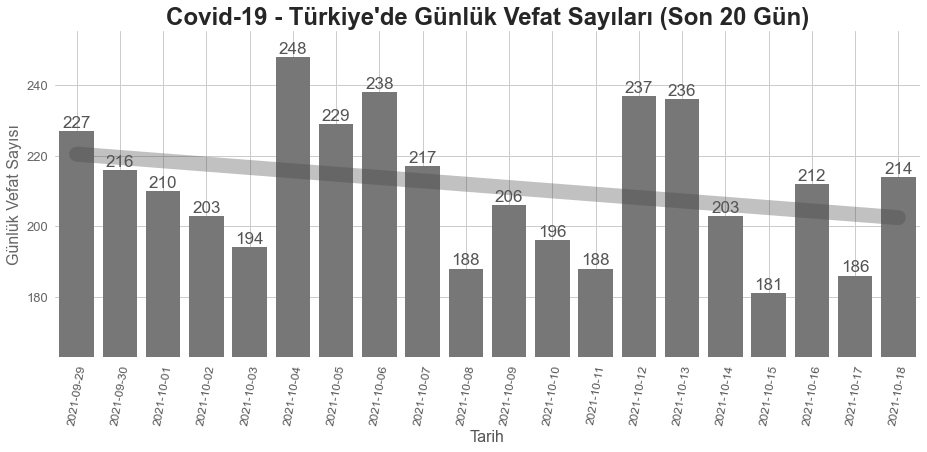

In [12]:
plt.figure(figsize=(15.5,6))
vefat_artis_son20 = covid19TR['Vefat Artış'][-20:]
slp, intcp = np.polyfit(list(range(20)), vefat_artis_son20, 1)
plt.bar(covid19TR.index[-20:], vefat_artis_son20, color='#777777')
plt.axis([-0.5,19.5,vefat_artis_son20.min()*0.9,vefat_artis_son20.max()*1.03])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#666666', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.67), covid19TR.iloc[i,16]+1, 
             "{:3}".format(int(covid19TR.iloc[i,16])), fontsize=17, color='#555555')
plt.plot([0, 19], [intcp, intcp+(slp*19)], color='#444444', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de Günlük Vefat Sayıları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Günlük Vefat Sayısı', fontsize=16, color='#666666')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün vefat sayılarına bakıldığında, maalesef önceki haftalara göre **benzer şekilde** sayıların açıklandığını görmekteyiz! Yine bir aşağı bir yukarı giderek sayı aralığının **180-250** içinde kalması ve ülke genelinde aşılamaya rağmen bu sayıların bir türlü **beklendiği şekilde aşağıya inmemesi** endişe vericidir!

## **Son 20 Güne Dair Toplam Vefat Sayıları**

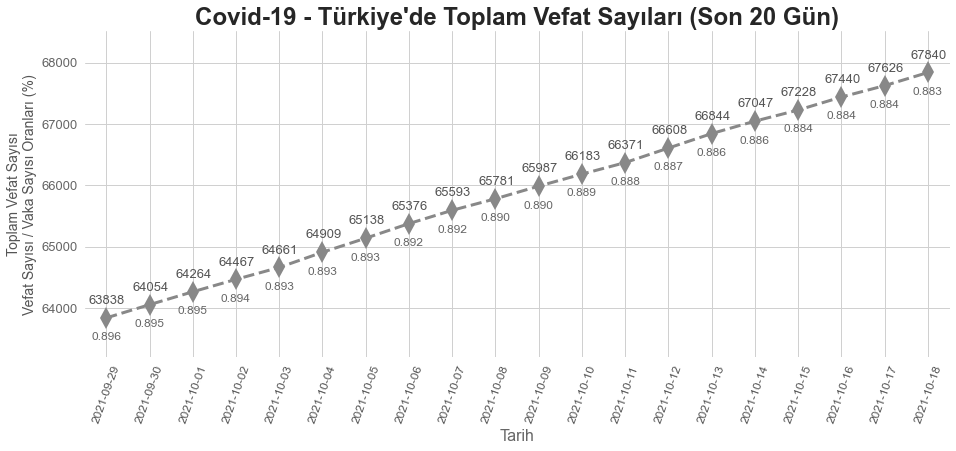

In [13]:
plt.figure(figsize=(15.5,6))
toplam_vefat_son20 = covid19TR['Toplam Vefat'][-20:]
plt.plot(covid19TR.index[-20:], toplam_vefat_son20, marker='d', markersize=15, linewidth=3, linestyle='--', color='#888888')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#666666', fontsize=13)
plt.axis([-0.5,19.5,min(toplam_vefat_son20)*0.99,max(toplam_vefat_son20)*1.01])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.6), covid19TR.iloc[i,1]+230, covid19TR.iloc[i,1], fontsize=13, color='#555555')
    plt.text(i-(len(covid19TR)-19.65), covid19TR.iloc[i,1]-360, 
             "{:.3f}".format(covid19TR.iloc[i,1]/covid19TR.iloc[i,9]*100), fontsize=12, color='#666666')
plt.title('Covid-19 - Türkiye\'de Toplam Vefat Sayıları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#666666')
plt.ylabel('Toplam Vefat Sayısı\nVefat Sayısı / Vaka Sayısı Oranları (%)', fontsize=14, color='#555555')
plt.grid(color='#d0d0d0')
plt.show()

Toplam vefat sayısı son verilere göre **68 bin**'e doğru yaklaşmaktadır!

Toplam vaka sayısına göre oran, 29 Eylül 2021'de **%0.896** iken, sürekli hafif şekilde düşerek 18 Ekim 2021'de **%0.883**'e doğru gerilemiştir.

## **Son 20 Günün Vefat Sayısı Değişim Grafiği**

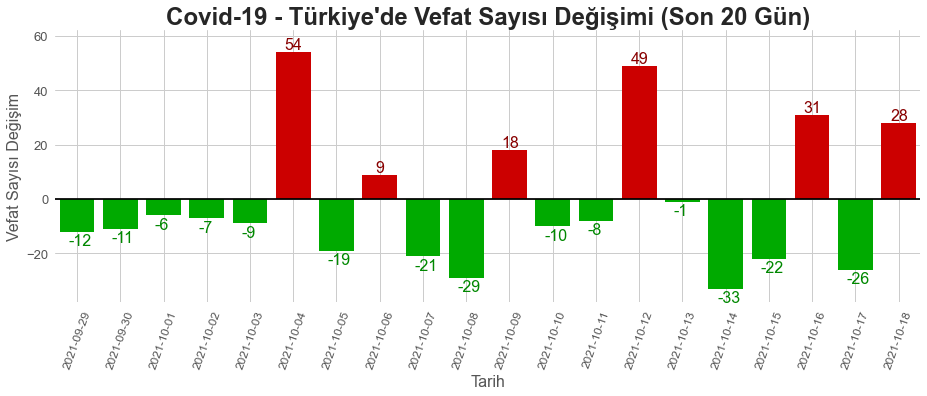

In [14]:
vefat_degisim = covid19TR['Vefat +/-'][-20:]
plt.figure(figsize=(15.5,5))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,18] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], vefat_degisim, color=barc)
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
plt.axis([-0.5, 19.5, min(vefat_degisim)*1.15, max(vefat_degisim)*1.15])
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,18] >= 10:    sh = 19.8;   vsh = 1;   c = '#880000'
    elif covid19TR.iloc[i,18] >= 0:   sh = 19.9;   vsh = 1;   c = '#880000'
    else:    sh = 19.8;    vsh = -5;   c = '#008800'
    plt.text(i-(len(covid19TR)-sh), covid19TR.iloc[i,18]+vsh, int(covid19TR.iloc[i,18]), fontsize=16, color=c)
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Vefat Sayısı Değişimi (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vefat Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Yukarıdaki grafiğe göre vefat sayısı, son 20 gün içinde, bir önceki güne kıyasla en fazla **54** yükselmiş (4 Ekim 2021) ve en fazla **33** azalmıştır (14 Ekim 2021).

## **Son 20 Gün İçindeki Günlük İyileşen Sayıları**

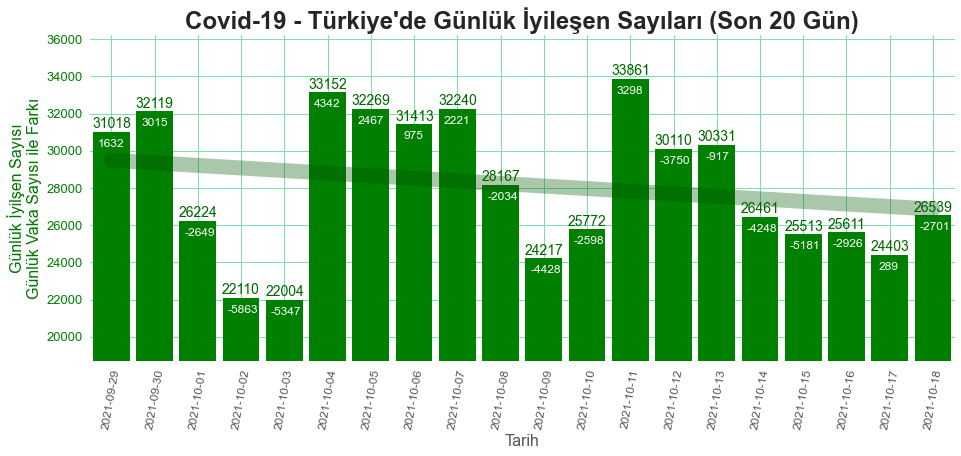

In [15]:
plt.figure(figsize=(15.5,6))
index = covid19TR['İyileşen Artış'][-20:].index
iyilesen_artis = covid19TR['İyileşen Artış'][-20:]
gunluk_vaka = covid19TR['Günlük Vaka'][-20:]
slp, intcp = np.polyfit(list(range(20)), iyilesen_artis, 1)
plt.bar(index, iyilesen_artis, color='g', width=0.85)
plt.axis([-0.5,19.5,iyilesen_artis.min()*0.85,iyilesen_artis.max()*1.07])
plt.xticks(index, rotation=80, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
for i in range(len(iyilesen_artis)):
    if iyilesen_artis[i] >= 10000:    sh = 0.44
    else:    sh = 0.36
    plt.text(i-sh, iyilesen_artis[i]+200, int(iyilesen_artis[i]), fontsize=14, color='#006600')
    if abs(iyilesen_artis[i] - gunluk_vaka[i]) >= 10000:    sh = 0.4
    elif abs(iyilesen_artis[i] - gunluk_vaka[i]) >= 1000:   sh = 0.31
    elif abs(iyilesen_artis[i] - gunluk_vaka[i]) >= 100:    sh = 0.25
    else:    sh = 0.17
    plt.text(i-sh, iyilesen_artis[i]-800, int(iyilesen_artis[i] - gunluk_vaka[i]), fontsize=12, color='white')
plt.plot([0, 19], [intcp, intcp+(slp*19)], color='#005500', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de Günlük İyileşen Sayıları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Günlük İyilşen Sayısı\nGünlük Vaka Sayısı ile Farkı', fontsize=16, color='#007700')
plt.grid(color='#7cdfac')
plt.show()

Günlük iyileşen sayısı, 12 Aralık 2020'de **izolasyon süresi dolan vakaların** da dahil edilmesi ile birlikte (yukarıdaki **NOT 6**'ya bakınız), son 20 gün içinde yine **düzensiz** şekilde aşağı ve yukarı yönlerde değiştiği ve genel anlamda **20 binin üzerinde** açıklandığı görülebilmektedir. Bu günler içinde en yüksek sayı **33861** ile 11 Ekim 2021'dir.

Yine grafiğe göre günlük iyileşen sayılarının, günlük vaka sayılarına göre **bir yüksek bir düşük** kaldığı görülmekte olup, farkın en yüksek olduğu tarih **eksi yönde 5863** ile 2 Ekim 2021'dir. 4 Ekim 2021'de ise **4342** ile **artı yönde** en yüksek farka ulaşılmıştır.

## **Son 20 Güne Dair Toplam İyileşen Sayıları**

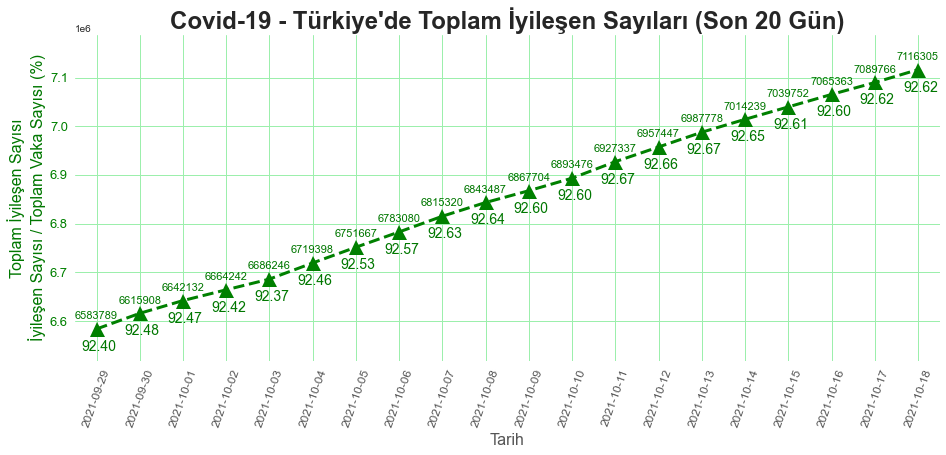

In [16]:
plt.figure(figsize=(15.5,6))
toplam_iyilesen_son20 = covid19TR['Toplam İyileşen'][-20:]
plt.plot(covid19TR.index[-20:], toplam_iyilesen_son20, marker='^', markersize=15, linewidth=3, linestyle='--', color='g')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
plt.axis([-0.5,19.5,min(toplam_iyilesen_son20)*0.99,max(toplam_iyilesen_son20)*1.01])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.5), covid19TR.iloc[i,2]+20000, covid19TR.iloc[i,2], fontsize=11, color='#007700')
    plt.text(i-(len(covid19TR)-19.65), covid19TR.iloc[i,2]-45000, 
             "{:.2f}".format(covid19TR.iloc[i,2]/covid19TR.iloc[i,9]*100), fontsize=14, color='#007700')
plt.title('Covid-19 - Türkiye\'de Toplam İyileşen Sayıları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam İyileşen Sayısı\nİyileşen Sayısı / Toplam Vaka Sayısı (%)', fontsize=16, color='#007700')
plt.grid(color='#9cefac')
plt.show()

İyileşen sayısı toplamda **7 milyon 100 bin**'i geçmiştir! Toplam vaka sayısına oranlarda baktığımızda, **izolasyon süresi dolan vakaların** dahil edilmesiyle birlikte (yukarıdaki **NOT 6**'ya bakınız); 29 Eylül 2021'de **%92.40** iken, genel anlamda **yukarıya doğru** ivmeyle birlikte 18 Ekim 2021'de **%92.62**'ye kadar ulaşmıştır.

## **Son 20 Günün İyileşen Sayısı Değişim Grafiği**

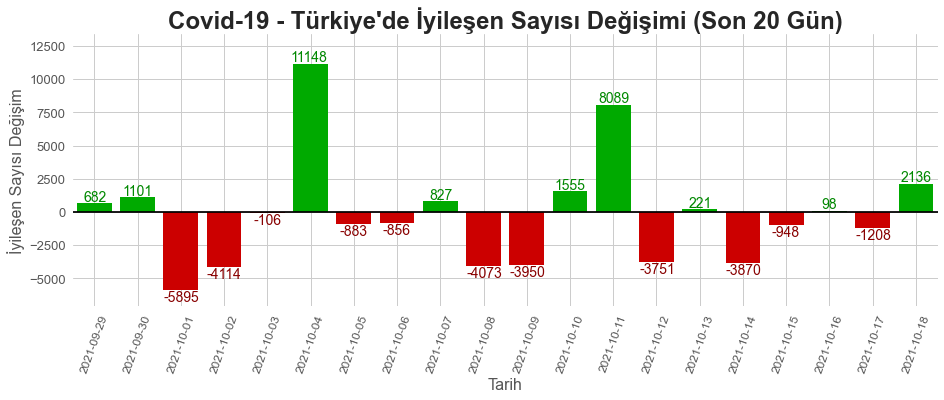

In [17]:
iyilesen_degisim = covid19TR['İyileşen +/-'][-20:]
index = covid19TR['İyileşen +/-'][-20:].index
plt.figure(figsize=(15.5,5))
barc = []
for i in range(20):
    if iyilesen_degisim[i] >= 0:
        barc.append('#00aa00')
    else:   barc.append('#cc0000')
plt.bar(index, iyilesen_degisim, color=barc)
plt.xticks(index, rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
plt.axis([-0.5, 19.5, min(iyilesen_degisim)*1.2, max(iyilesen_degisim)*1.2])
for i in range(20):
    if iyilesen_degisim[i] >= 0:
        if int(iyilesen_degisim[i]) >= 10000:    sh = 0.46
        elif int(iyilesen_degisim[i]) >= 1000:   sh = 0.35
        elif int(iyilesen_degisim[i]) >= 100:    sh = 0.25
        else:    sh = 0.18
        plt.text(i-sh, iyilesen_degisim[i]+160, int(iyilesen_degisim[i]), fontsize=14, color='#008800')
    else:
        if int(iyilesen_degisim[i]) <= -10000:    sh = 0.5
        elif int(iyilesen_degisim[i]) <= -1000:   sh = 0.4
        elif int(iyilesen_degisim[i]) <= -100:    sh = 0.33
        else:    sh = 0.25
        plt.text(i-sh, iyilesen_degisim[i]-850, int(iyilesen_degisim[i]), fontsize=14, color='#880000')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de İyileşen Sayısı Değişimi (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('İyileşen Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün iyileşen sayısı değişiminde, en fazla artış **4 Ekim 2021**'de **11148** ile gerçekleşirken; en fazla düşüş **5895** ile **1 Ekim 2021**'de görülmüştür. 

## **Son 20 Gün İçindeki Günlük İyileşen Sayısının Vaka Sayısına Oranı**

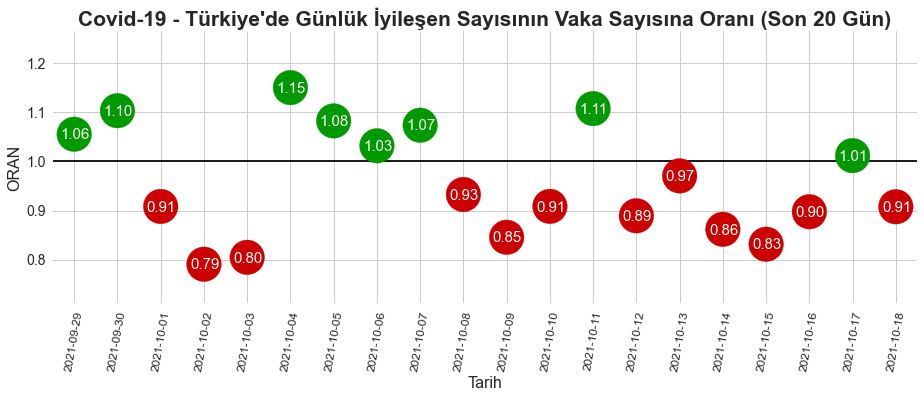

In [18]:
index = covid19TR['İyileşen Artış'][-20:].index
iyilesen_artis = covid19TR['İyileşen Artış'][-20:]
gunluk_vaka = covid19TR['Günlük Vaka'][-20:]
oranlar = iyilesen_artis / gunluk_vaka
colors = []
for i in range(20):
    if oranlar[i] < 1.0:    colors.append('#cc0000')
    else:    colors.append('#009900')
plt.figure(figsize=(15.5,5))
plt.axis([-0.5, 19.5, min(oranlar)*0.9, max(oranlar)*1.1])
plt.axhline(1.0, color='black', zorder=1)
plt.scatter(index, oranlar, marker="o", s=1200, color=colors, zorder=2)
for i in range(20):
    plt.text(i-0.32, oranlar[i]-0.01, "{:.2f}".format(round(oranlar[i], 2)), color='white', fontsize=15)
plt.title("Covid-19 - Türkiye\'de Günlük İyileşen Sayısının Vaka Sayısına Oranı (Son 20 Gün)", 
          fontsize=21, fontweight='bold')
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('ORAN', fontsize=16)
plt.xticks(rotation=80, fontsize=12)
plt.yticks(fontsize=14)
plt.grid(color='#cccccc', zorder=0)
plt.show()

12 Aralık 2020'den sonra **izolasyon süresi dolan vakaların** da dahil edilmesinden sonra (yukarıdaki **NOT 6**'ya bakınız), son 20 gün içindeki günlük iyileşen sayısının günlük vaka sayısına oranlara baktığımızda, **çoğunlukla 1'in altında** olduğunu görmekteyiz! Bunlar içinde en yüksek olan ise **1.15** ile yeniden 4 Ekim 2021 tarihini görmekteyiz.

Son altı güne baktığımızda oranların genelde **1'in altında** çıktığına rastlamaktayız.

## **Son 20 Günün Toplam Aktif Vaka Sayıları**

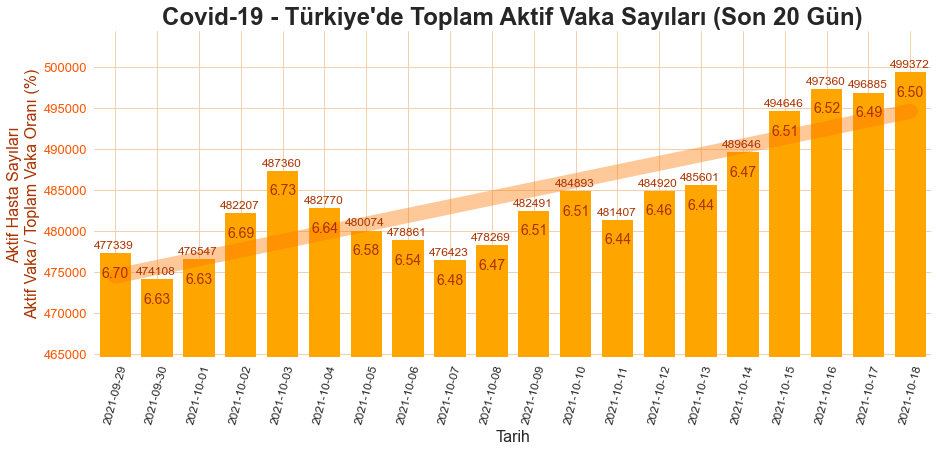

In [19]:
covid19TR['Toplam Aktif Vaka'] = covid19TR['Toplam Vaka'] - covid19TR['Toplam Vefat'] - covid19TR['Toplam İyileşen']
slp, intcp = np.polyfit(list(range(20)), covid19TR['Toplam Aktif Vaka'][-20:], 1)
plt.figure(figsize=(15,6))
plt.bar(covid19TR.index[-20:], covid19TR['Toplam Aktif Vaka'][-20:], color='orange', width=0.75)
plt.axis([-0.5,19.5,covid19TR['Toplam Aktif Vaka'][-20:].min()*0.98,covid19TR['Toplam Aktif Vaka'][-20:].max()*1.01])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.5), covid19TR.iloc[i,22]+500, "{:6}".format(int(covid19TR.iloc[i,22])),
             fontsize=12, color='#aa3300')
    if covid19TR.iloc[i,19]/covid19TR.iloc[i,9]*100 >= 10:    sh = 19.6
    else:    sh = 19.68
    plt.text(i-(len(covid19TR)-sh), covid19TR.iloc[i,22]-3000, 
             "{:3.2f}".format(round(covid19TR.iloc[i,22]/covid19TR.iloc[i,9]*100, 2)), fontsize=14, color='#aa3300')
plt.plot([0,19],[intcp,intcp+(slp*19)], linewidth=15, alpha=0.4, color='#ff7700')
plt.xticks(rotation=75, fontsize=12)
plt.yticks(fontsize=13, color='#ff5500')
plt.title('Covid-19 - Türkiye\'de Toplam Aktif Vaka Sayıları (Son 20 Gün)', fontsize=24, fontweight='bold')
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('Aktif Hasta Sayıları\nAktif Vaka / Toplam Vaka Oranı (%)', fontsize=16, color='#aa3300')
plt.grid(color='#f3d0ad')
plt.show()

Yukarıda incelediğimiz tüm günlük vaka, vefat ve iyileşen sayılarını beraber düşündüğümüzde, son 20 günün aktif vaka sayılarının yine **bir aşağı yukarı şekilde** gittiğini bu grafikte de rastlayabilmekteyiz. Ancak genel anlamda **yukarıya doğru ivme aldığı** da belirgin şekilde ortadadır. En son 18 Ekim 2021'de **500 bin**'e çok yakın olduğu görülmektedir.

Toplam vaka sayısına göre oranlar ise gözle görülür şekilde **büyük bir değişim olmamış** ve genelde **%6.4** ile **%6.75** arasında kalmıştır.

### **Son 180 Güne Dair Günlük Test, Vaka, Vefat ve İyileşen Sayılarının İstatistikleri ve Dağılımları**

In [20]:
round(covid19TR[['Test Artış', 'Günlük Vaka', 'Vefat Artış' , 'İyileşen Artış']][-180:].describe(), 2)

,Test Artış,Günlük Vaka,Vefat Artış,İyileşen Artış
count,180.00,180.00,180.00,180.00
mean,266498.37,17982.98,171.47,18177.57
std,51531.67,10559.58,95.50,14962.76
min,184462.00,4418.00,35.00,4143.00
25%,223368.75,7067.25,70.50,5899.25
50%,246342.50,19371.00,188.00,14262.00
75%,303284.25,26417.50,238.25,26480.50
max,363536.00,54791.00,394.00,81302.00


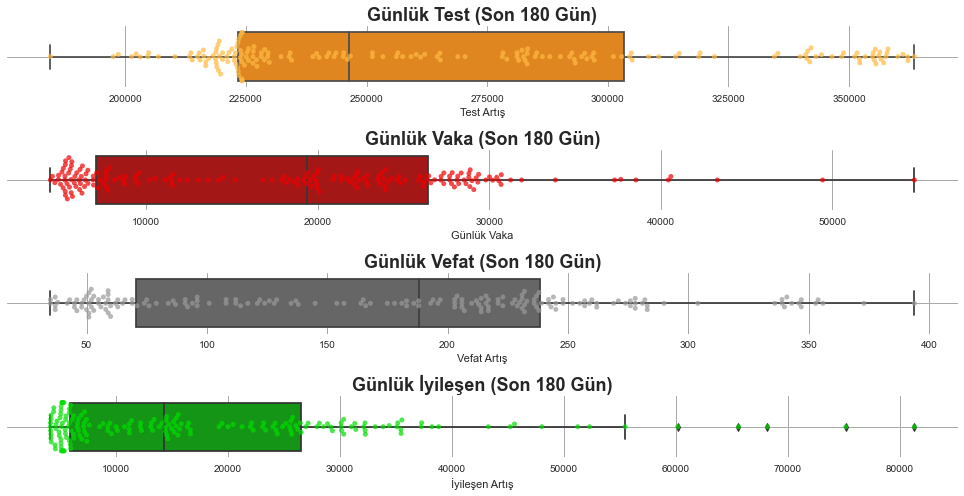

In [21]:
plt.figure(figsize=(13.5,7))
plt.subplot(4,1,1)
sns.boxplot(x='Test Artış', data=covid19TR[-180:], color='#ff8800')
sns.swarmplot(x='Test Artış', data=covid19TR[-180:], color='#ffba42', alpha=0.7)
plt.title('Günlük Test (Son 180 Gün)', fontsize=18, fontweight='bold')
plt.grid(color='#aaaaaa')
plt.subplot(4,1,2)
sns.boxplot(x='Günlük Vaka', data=covid19TR[-180:], color='#bb0000')
sns.swarmplot(x='Günlük Vaka', data=covid19TR[-180:], color='#ee0000', alpha=0.7)
plt.title('Günlük Vaka (Son 180 Gün)', fontsize=18, fontweight='bold')
plt.grid(color='#aaaaaa')
plt.subplot(4,1,3)
sns.boxplot(x='Vefat Artış', data=covid19TR[-180:], color='#666666')
sns.swarmplot(x='Vefat Artış', data=covid19TR[-180:], color='#999999', alpha=0.7)
plt.title('Günlük Vefat (Son 180 Gün)', fontsize=18, fontweight='bold')
plt.grid(color='#aaaaaa')
plt.subplot(4,1,4)
sns.boxplot(x='İyileşen Artış', data=covid19TR[-180:], color='#00aa00')
sns.swarmplot(x='İyileşen Artış', data=covid19TR[-180:], color='#00dd00', alpha=0.7)
plt.title('Günlük İyileşen (Son 180 Gün)', fontsize=18, fontweight='bold')
plt.grid(color='#aaaaaa')
plt.tight_layout()
plt.show()

### **Son 180 Güne Dair Vaka, Vefat & İyileşen Sayısı Değişimi İstatistikleri ve Dağılımları**

In [22]:
round(covid19TR[['Vaka +/-', 'Vefat +/-', 'İyileşen +/-']][-180:].describe(),2)

,Vaka +/-,Vefat +/-,İyileşen +/-
count,180.00,180.00,180.00
mean,-181.82,-0.82,-142.63
std,1872.84,18.69,5425.78
min,-8842.00,-52.00,-39744.00
25%,-724.50,-12.00,-1071.75
50%,-196.50,-3.00,12.00
75%,619.50,9.00,838.75
max,5989.00,55.00,24930.00


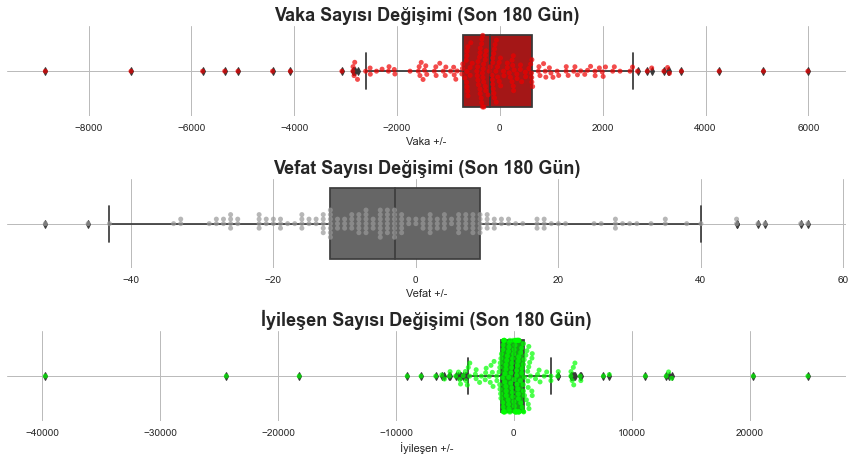

In [23]:
plt.figure(figsize=(12,6.5))
plt.subplot(3,1,1)
sns.boxplot(x='Vaka +/-', data=covid19TR[-180:], color='#bb0000')
sns.swarmplot(x='Vaka +/-', data=covid19TR[-180:], color='#ee0000', alpha=0.7)
plt.grid(color='#bbbbbb')
plt.title('Vaka Sayısı Değişimi (Son 180 Gün)', fontsize=18, fontweight='bold')
plt.subplot(3,1,2)
sns.boxplot(x='Vefat +/-', data=covid19TR[-180:], color='#666666')
sns.swarmplot(x='Vefat +/-', data=covid19TR[-180:], color='#999999', alpha=0.7)
plt.grid(color='#bbbbbb')
plt.title('Vefat Sayısı Değişimi (Son 180 Gün)', fontsize=18, fontweight='bold')
plt.subplot(3,1,3)
sns.boxplot(x='İyileşen +/-', data=covid19TR[-180:], color='#00bb00')
sns.swarmplot(x='İyileşen +/-', data=covid19TR[-180:], color='#00ff00', alpha=0.7)
plt.grid(color='#bbbbbb')
plt.title('İyileşen Sayısı Değişimi (Son 180 Gün)', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

_ÖNEMLİ!: 4 Temmuz 2021'den itibaren gösterilmeye başlanan yeni Günlük Covid-19 Tablosu ile artık Hasta Sayısı verisi paylaşılmadığından ilgili çubuk yukarıdaki iki grafikte yer almamaktadır!_

### **25 Kasım 2020 Sonrası Günlük Vaka, Vefat ve İyileşen Sayılarının Birbirleriyle İlişkileri ve Katsayıları**

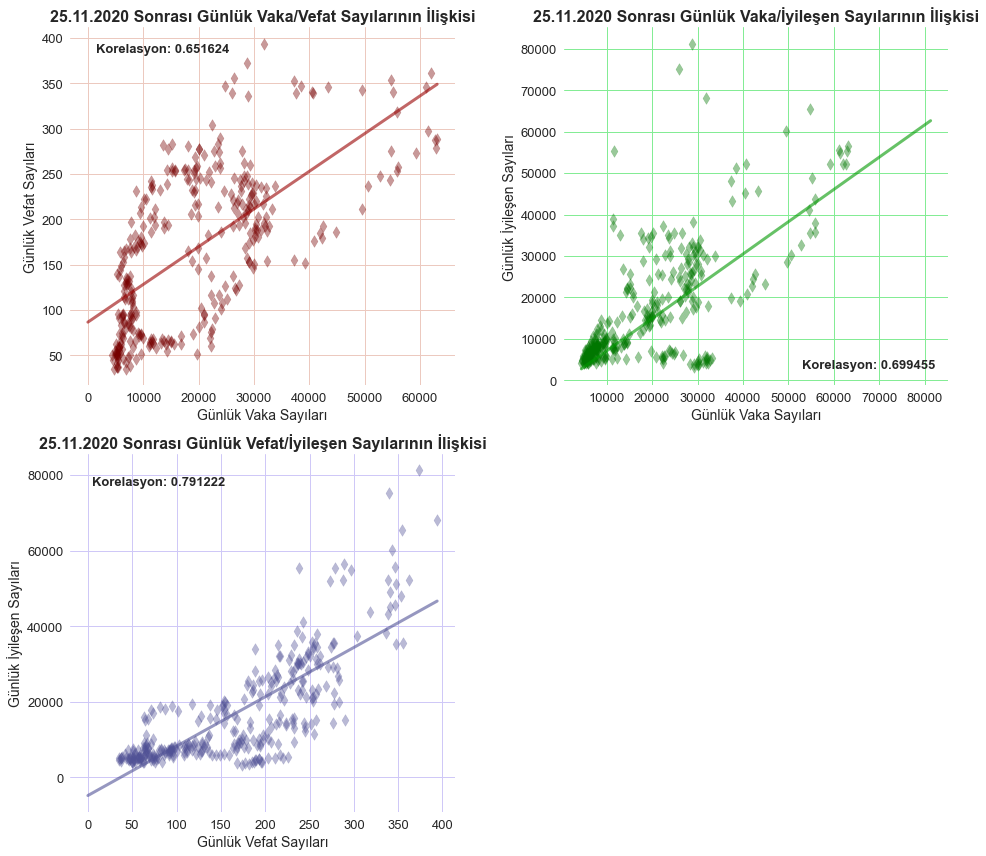

In [24]:
gunluk_vaka_25kas2020_sonra = covid19TR['Günlük Vaka'][259:]
vefat_artis_25kas2020_sonra = covid19TR['Vefat Artış'][259:]
iyilesen_artis_12ara2020_haric = np.concatenate((covid19TR['İyileşen Artış'][259:276].values,
                                                 covid19TR['İyileşen Artış'][277:].values))
slp1, intcp1 = np.polyfit(gunluk_vaka_25kas2020_sonra, vefat_artis_25kas2020_sonra, 1)
x1 = [0, gunluk_vaka_25kas2020_sonra.max()]
y1 = [intcp1+x1[0], intcp1+(slp1*x1[1])]
plt.figure(figsize=(14,12))
plt.subplot(2, 2, 1)
plt.title('25.11.2020 Sonrası Günlük Vaka/Vefat Sayılarının İlişkisi', fontsize=16, fontweight='bold')
plt.scatter(gunluk_vaka_25kas2020_sonra, vefat_artis_25kas2020_sonra, marker='d', s=70, color='#770000', alpha=0.4)
plt.plot(x1, y1, alpha=0.6, linewidth=3, color='#990000')
plt.text(gunluk_vaka_25kas2020_sonra.min()-3000, vefat_artis_25kas2020_sonra.max()-10,
         "Korelasyon: " + str(round(np.corrcoef(gunluk_vaka_25kas2020_sonra, vefat_artis_25kas2020_sonra)[0,1], 6)), 
         fontsize=13, fontweight='bold')
plt.xlabel('Günlük Vaka Sayıları', fontsize=14)
plt.ylabel('Günlük Vefat Sayıları', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#ecc9bf')
slp2, intcp2 = np.polyfit(gunluk_vaka_25kas2020_sonra.drop('2020-12-12'), iyilesen_artis_12ara2020_haric, 1)
x2 = [gunluk_vaka_25kas2020_sonra.min(), iyilesen_artis_12ara2020_haric.max()]
y2 = [intcp2, intcp2+(slp2*(x2[1]))]
plt.subplot(2, 2, 2)
plt.title('25.11.2020 Sonrası Günlük Vaka/İyileşen Sayılarının İlişkisi', fontsize=16, fontweight='bold')
plt.scatter(gunluk_vaka_25kas2020_sonra.drop('2020-12-12'), iyilesen_artis_12ara2020_haric, 
            marker='d', s=70, color='#007700', alpha=0.4)
plt.text(gunluk_vaka_25kas2020_sonra.max()-10000, iyilesen_artis_12ara2020_haric.min()-500,
         "Korelasyon: " + str(round(np.corrcoef(gunluk_vaka_25kas2020_sonra.drop('2020-12-12'),
                                                iyilesen_artis_12ara2020_haric)[0,1], 6)), fontsize=13, fontweight='bold')
plt.plot(x2, y2, alpha=0.6, linewidth=3, color='#009900')
plt.xlabel('Günlük Vaka Sayıları', fontsize=14)
plt.ylabel('Günlük İyileşen Sayıları', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#84ec95')
slp3, intcp3 = np.polyfit(vefat_artis_25kas2020_sonra.drop('2020-12-12'), iyilesen_artis_12ara2020_haric, 1)
x3 = [0, vefat_artis_25kas2020_sonra.max()]
y3 = [intcp3+x3[0], intcp3+(slp3*x3[1])]
plt.subplot(2, 2, 3)
plt.title('25.11.2020 Sonrası Günlük Vefat/İyileşen Sayılarının İlişkisi', fontsize=16, fontweight='bold')
plt.scatter(vefat_artis_25kas2020_sonra.drop('2020-12-12'), iyilesen_artis_12ara2020_haric, 
            marker='d', s=70, color='#515296', alpha=0.4)
plt.plot(x3, y3, alpha=0.6, linewidth=3, color='#515296')
plt.text(vefat_artis_25kas2020_sonra.min()-30, iyilesen_artis_12ara2020_haric.max()-4000,
         "Korelasyon: " + str(round(np.corrcoef(vefat_artis_25kas2020_sonra.drop('2020-12-12'), 
                                                iyilesen_artis_12ara2020_haric)[0,1], 6)), fontsize=13, fontweight='bold')
plt.xlabel('Günlük Vefat Sayıları', fontsize=14)
plt.ylabel('Günlük İyileşen Sayıları', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#cfc8f7')
plt.tight_layout()
plt.show()

_**ÖNEMLİ 1:** 12 Aralık 2020'ye ait iyileşen artış sayısının 1 milyonun üzerinde çıkmasından dolayı tutarlılık açısından ilgili grafiklere dahil edilmemiştir!_

_**ÖNEMLİ 2:** 4 Temmuz 2021'den itibaren gösterilmeye başlanan yeni Günlük Covid-19 Tablosu ile artık Hasta Sayısı verisi paylaşılmadığından ilgili ilişki grafikleri yer almamaktadır!_

### Test, Vaka, Vefat ve İyileşen Artışlarının Aylık Toplamları

In [25]:
analiz_sutunlar = ['Test Artış', 'Günlük Vaka', 'Vefat Artış', 'İyileşen Artış',
                   'Test +/-', 'Vaka +/-', 'Vefat +/-', 'İyileşen +/-']
covid19TR = covid19TR.reset_index()
covid19TR['Tarih'] = pd.to_datetime(covid19TR['Tarih'])
covid19TR_aylik_toplam = covid19TR.resample('M', on='Tarih')[analiz_sutunlar[:4]].sum()
covid19TR_aylik_toplam.columns = ['Toplam Test', 'Toplam Vaka', 'Toplam Vefat', 'Toplam İyileşen']
covid19TR_aylik_toplam

,Toplam Test,Toplam Vaka,Toplam Vefat,Toplam İyileşen
Tarih,,,,
2020-03-31,92403,0,214,243
2020-04-30,941214,0,2960,48643
2020-05-31,1005577,0,1366,79087
2020-06-30,1342456,0,591,45138
2020-07-31,1419173,0,560,41424
2020-08-31,2337669,0,679,30391
2020-09-30,3241769,0,1825,34823
2020-10-31,3621553,0,2057,44222
2020-11-30,4590478,177931,3494,80756


_Buradaki Toplam Vaka sayılarının aylık toplamlarının 25 Kasım 2020 ve sonrasına ait olduğu unutulmamalıdır._

### Aynı Sütunların ve Değişimlerinin Aylık Ortalamaları

In [26]:
covid19TR_aylik_ortalama = covid19TR.resample('M', on='Tarih')[analiz_sutunlar].mean().fillna(0)
round(covid19TR_aylik_ortalama, 2)

,Test Artış,Günlük Vaka,Vefat Artış,İyileşen Artış,Test +/-,Vaka +/-,Vefat +/-,İyileşen +/-
Tarih,,,,,,,,
2020-03-31,4400.14,0.00,10.19,11.57,734.38,0.00,2.19,3.86
2020-04-30,31373.80,0.00,98.67,1621.43,886.07,0.00,1.57,159.43
2020-05-31,32437.97,0.00,44.06,2551.19,-206.58,0.00,-2.19,-125.00
2020-06-30,44748.53,0.00,19.70,1504.60,496.40,0.00,-0.30,10.43
2020-07-31,45779.77,0.00,18.06,1336.26,-129.03,0.00,0.03,-9.87
2020-08-31,75408.68,0.00,21.90,980.35,2051.94,0.00,0.87,2.94
2020-09-30,108058.97,0.00,60.83,1160.77,66.53,0.00,0.70,5.27
2020-10-31,116824.29,0.00,66.35,1426.52,387.45,0.00,0.32,8.42
2020-11-30,153015.93,5931.03,116.47,2691.87,1751.57,1040.63,3.77,99.30


_Buradaki Günlük Vaka sayılarının aylık ortalamaları ve değişimlerinin 25 Kasım 2020 ve sonrasına ait olduğu unutulmamalıdır._

## SONUÇ

**Yukarıdaki analizlerde tüm bu rakamlar ve görseller gösteriyor ki Türkiye'de 18 aydır süren Koronavirüs riski delta varyantı ile birlikte aynı seviyede DEVAM ETMEKTEDİR!**

**AŞILAMANIN aynı hızda sürmesiyle birlikte her geçen gün daha fazla vatandaşımızın aşı olmasına karşın (üçüncü dozlar da dahil), henüz belirgin şekilde özellikle de vaka ve vefat sayılarına yeterince olumlu yönde yansımadığını görmekteyiz! Pozitif çıkan PCR testlerin ve vefatların hemen hemen hepsinin aşısız insanlardan kaynaklandığını (genç nüfusta bu oran giderek yükselmektedir) haberlerde izlemekteyiz ki aşıların KORUYUCU olduğunun önemi bir kez daha gözler önümüze serilmektedir!**

**YENİDEN UYARALIM! Virüsün yayılmasına engel olmak için - aşılanmış olsak bile - hala virüs yokmuş gibi davranmamaya; kendimizi, sevdiklerimizi ve etrafımızdaki insanları önemseyerek tedbirlerimizi almaya devam edelim. Aşımızı sıramız gelene kadar düzenli şekilde PCR testlerini yaptırmaya ve erişim hakkımız geldiyse bir an önce aşı randevumuzu almaya özen gösterelim. Bir, iki ya da üç doz aşı olsak dahi hala maske takmaya, dezenfaktan kullanmaya, hijyenimize dikkat etmeye, kalabalık ortamlarda fazla kalmamaya ve açık/kapalı alanlarda sosyal mesafeyi korumaya özen gösterelim! Bunlarla beraber güvenilir kaynaklardan, T.C. Sağlık Bakanlığı'dan, Türkiye'den ve Dünya'dan Koronavirüs ile ilgili en son haberleri edinmeye çalışalım!**

## Koronavirüsü tamamen yendiğimiz günlerde buluşmak dileğiyle...